In [15]:
import pandas as pd

penguins = pd.read_csv('data/penguins.csv').dropna()

In [16]:
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,0
...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2
340,43.5,18.1,202.0,3400.0,2
341,49.6,18.2,193.0,3775.0,2
342,50.8,19.0,210.0,4100.0,2


In [17]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
# we'll just rescale the FlipperLength and BodyMass so they're on a similar scale to the bill measurements
penguins['FlipperLength'] = penguins['FlipperLength']/10
penguins['BodyMass'] = penguins['BodyMass']/100

In [18]:
penguins

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,18.1,37.50,0
1,39.5,17.4,18.6,38.00,0
2,40.3,18.0,19.5,32.50,0
4,36.7,19.3,19.3,34.50,0
5,39.3,20.6,19.0,36.50,0
...,...,...,...,...,...
339,55.8,19.8,20.7,40.00,2
340,43.5,18.1,20.2,34.00,2
341,49.6,18.2,19.3,37.75,2
342,50.8,19.0,21.0,41.00,2


In [19]:

#OVERSAMPLE DATA TO MAKE IT BIGGER FOR DEEP LEARNING TRAINING
for i in range(1,3):
    penguins = penguins.append(penguins)
sample = penguins.sample(10)
sample

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
313,52.0,20.7,21.0,48.00,2
275,49.9,16.1,21.3,54.00,1
312,47.6,18.3,19.5,38.50,2
256,47.3,13.8,21.6,47.25,1
36,38.8,20.0,19.0,39.50,0
324,51.5,18.7,18.7,32.50,2
71,39.7,18.4,19.0,39.00,0
343,50.2,18.7,19.8,37.75,2
228,47.5,14.2,20.9,46.00,1
242,47.5,15.0,21.8,49.50,1


In [22]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinastrap']
print(sample.columns[0:5].values, 'SpeciesName')
for index, row in penguins.sample(10).iterrows():
    print('[',row[0], row[1], row[2],row[3], int(row[4]), ']',penguin_classes[int(row[-1])])

['CulmenLength' 'CulmenDepth' 'FlipperLength' 'BodyMass' 'Species'] SpeciesName
[ 45.7 17.0 19.5 36.5 2 ] Chinastrap
[ 46.0 21.5 19.4 42.0 0 ] Adelie
[ 38.1 17.6 18.7 34.25 0 ] Adelie
[ 41.8 19.4 19.8 44.5 0 ] Adelie
[ 51.5 16.3 23.0 55.0 1 ] Gentoo
[ 34.4 18.4 18.4 33.25 0 ] Adelie
[ 40.2 17.0 17.6 34.5 0 ] Adelie
[ 50.9 17.9 19.6 36.75 2 ] Chinastrap
[ 42.9 17.6 19.6 47.0 0 ] Adelie
[ 46.4 15.6 22.1 50.0 1 ] Gentoo


In [25]:
from sklearn.model_selection import train_test_split

features = ['CulmenLength','CulmenDepth','FlipperLength','BodyMass']
label = 'Species'
# Split data 70%-30% into training set and test set

x_train, x_test, y_train, y_test = train_test_split(penguins[features].values,
                                                    penguins[label].values,
                                                    test_size=0.30,
                                                    random_state=0)


print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + penguin_classes[y_train[n]] + ')')


Training Set: 957, Test Set: 411 

Sample of features and labels:
[51.1 16.5 22.5 52.5] 1 (Gentoo)
[50.7 19.7 20.3 40.5] 2 (Chinastrap)
[49.5 16.2 22.9 58. ] 1 (Gentoo)
[39.3 20.6 19.  36.5] 0 (Adelie)
[42.5 20.7 19.7 45. ] 0 (Adelie)
[50.  15.3 22.  55.5] 1 (Gentoo)
[50.2  18.7  19.8  37.75] 2 (Chinastrap)
[50.7 19.7 20.3 40.5] 2 (Chinastrap)
[49.1  14.5  21.2  46.25] 1 (Gentoo)
[43.2 16.6 18.7 29. ] 2 (Chinastrap)
[38.8  17.6  19.1  32.75] 0 (Adelie)
[37.8 17.1 18.6 33. ] 0 (Adelie)
[45.8 14.2 21.9 47. ] 1 (Gentoo)
[43.8 13.9 20.8 43. ] 1 (Gentoo)
[36.  17.1 18.7 37. ] 0 (Adelie)
[43.3 13.4 20.9 44. ] 1 (Gentoo)
[36.  18.5 18.6 31. ] 0 (Adelie)
[41.1  19.   18.2  34.25] 0 (Adelie)
[33.1 16.1 17.8 29. ] 0 (Adelie)
[40.9 13.7 21.4 46.5] 1 (Gentoo)
[45.2 17.8 19.8 39.5] 2 (Chinastrap)
[48.4 14.6 21.3 58.5] 1 (Gentoo)
[43.6 13.9 21.7 49. ] 1 (Gentoo)
[38.5  17.9  19.   33.25] 0 (Adelie)


In [26]:
!pip install torch==1.9.0+cpu torchvision==0.10.0+cpu torchaudio==0.9.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html

You should consider upgrading via the 'c:\usersminiconda3\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: torch
    Found existing installation: torch 1.8.1+cu102
    Uninstalling torch-1.8.1+cu102:
      Successfully uninstalled torch-1.8.1+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.9.1
    Uninstalling torchvision-0.9.1:
      Successfully uninstalled torchvision-0.9.1
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.8.1
    Uninstalling torchaudio-0.8.1:
      Successfully uninstalled torchaudio-0.8.1


In [27]:
import torch
import torch.nn as nn
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 1.9.0+cpu


In [28]:
# Create a dataset and loader for the train data and labels

train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()

train_ds = td.TensorDataset(train_x, train_y)
train_loader = td.DataLoader(train_ds, batch_size = 20, shuffle = False, num_workers = 1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)
print('Ready to load data')



Ready to load data


# Define a neural network¶
Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:

An input layer that receives an input value for each feature (in this case, the four penguin measurements) and applies a ReLU activation function.
A hidden layer that receives ten inputs and applies a ReLU activation function.
An output layer that generates a non-negative numeric output for each penguin species (which a loss function will translate into classification probabilities for each of the three possible penguin species).

In [51]:
#Number of hidden layers 
hl = 10 


class PenguinNet(nn.Module):
    def __init__(self):
        super(PenguinNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl,hl)
        self.fc3 = nn.Linear(hl, len(penguin_classes))
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x
    

model = PenguinNet()
print(model)



PenguinNet(
  (fc1): Linear(in_features=4, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


In [52]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)


Epoch: 1
Training set: Average loss: 0.830955
Validation set: Average loss: 0.775617, Accuracy: 311/411 (76%)

Epoch: 2
Training set: Average loss: 0.707225
Validation set: Average loss: 0.712004, Accuracy: 314/411 (76%)

Epoch: 3
Training set: Average loss: 0.649659
Validation set: Average loss: 0.671876, Accuracy: 314/411 (76%)

Epoch: 4
Training set: Average loss: 0.611418
Validation set: Average loss: 0.641149, Accuracy: 314/411 (76%)

Epoch: 5
Training set: Average loss: 0.582680
Validation set: Average loss: 0.614695, Accuracy: 315/411 (77%)

Epoch: 6
Training set: Average loss: 0.558517
Validation set: Average loss: 0.592009, Accuracy: 315/411 (77%)

Epoch: 7
Training set: Average loss: 0.536566
Validation set: Average loss: 0.569735, Accuracy: 315/411 (77%)

Epoch: 8
Training set: Average loss: 0.514875
Validation set: Average loss: 0.549778, Accuracy: 315/411 (77%)

Epoch: 9
Training set: Average loss: 0.493670
Validation set: Average loss: 0.527709, Accuracy: 316/411 (77%)

E

# Review training and validation loss¶
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:

The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.
Let's plot the loss metrics and see:Review training and validation loss¶
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:

The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
The training loss and validation loss should follow a similar trend, showing that the model is not overfitting to the training data.
Let's plot the loss metrics and see:

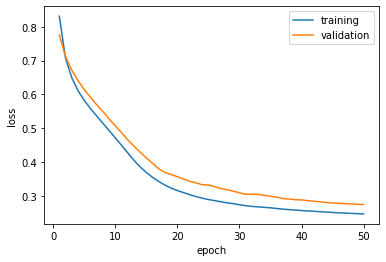

In [53]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

View the learned weights and biases
The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:

Layer 1: There are four input values going to ten output nodes, so there should be 10 x 4 weights and 10 bias values.
Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
Layer 3: There are ten input values going to three output nodes, so there should be 3 x 10 weights and 3 bias values.

In [49]:
for param_tensor in model.state_dict():
    print(param_tensor, "\n", model.state_dict()[param_tensor].numpy())

fc1.weight 
 [[-0.2805583  -0.3847404   0.33566517  0.3554656 ]
 [-0.05690634 -0.289343    0.38645273  0.31974447]
 [ 0.03716701 -0.23606765  0.45952392  0.20447034]
 [-0.3795727   0.47854143  0.3796869  -0.18224543]
 [ 0.28107727 -0.2840945  -0.07835716  0.4245506 ]
 [ 0.02065957 -0.35360909 -0.16711646 -0.13572258]
 [-0.0964644   0.04785031  0.4624148   0.02677017]
 [-0.30872     0.02562714  0.23974359  0.24802011]
 [-0.45696926 -0.08947122 -0.37157226 -0.21334279]
 [ 0.1801467  -0.3550651   0.18586344  0.42438906]]
fc1.bias 
 [ 0.03279418 -0.33324385 -0.17914248  0.10918206 -0.381159    0.24840516
 -0.4539348  -0.48064667 -0.4858303  -0.10143167]
fc2.weight 
 [[ 0.21264192 -0.29930294  0.26284447 -0.12649834  0.09261808  0.0144209
  -0.28514862  0.26225683  0.17027077  0.314329  ]
 [ 0.15976211 -0.20873214  0.26391855  0.01699549  0.1499604  -0.25356063
  -0.09095548 -0.31049696 -0.12316835  0.06822017]
 [-0.24828994  0.10080209  0.16975322  0.04405347 -0.21158274 -0.24517761
  -0.0

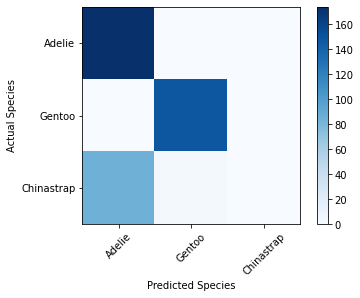

In [54]:
from sklearn.metrics import confusion_matrix
import numpy as np


#set the model to evaluate mode
model.eval()

x = torch.Tensor(x_test).float()
_, predicted = torch.max(model(x).data, 1)


cm = confusion_matrix(y_test, predicted.numpy())
plt.imshow(cm, interpolation = "nearest", cmap = plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(penguin_classes))
plt.xticks(tick_marks, penguin_classes, rotation=45)
plt.yticks(tick_marks, penguin_classes)
plt.xlabel("Predicted Species")
plt.ylabel("Actual Species")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

# Save the trained model
Now that we have a model we believe is reasonably accurate, we can save its trained weights for use later.

In [55]:
# Save the model weights
model_file = 'models/penguin_classifier.pt'
torch.save(model.state_dict(), model_file)
del model
print('model saved as', model_file)

model saved as models/penguin_classifier.pt


In [47]:
print(model)

models/penguin_classifier.pt


# Use the trained model
When we have a new penguin observation, we can use the model to predict the species.

In [56]:
x_new = [[50.4, 15.3, 20, 50]]
print('New Sample: {}'.format(x_new))


model = PenguinNet()
model.load_state_dict(torch.load(model_file))

model.eval()

x = torch.Tensor(x_new).float()
_, predicted = torch.max(model(x).data, 1)
print('Prediction:',penguin_classes[predicted.item()])

New Sample: [[50.4, 15.3, 20, 50]]
Prediction: Gentoo


In [58]:
predicted.item()

1